<a href="https://colab.research.google.com/github/kroosYE/project/blob/main/%E8%85%AB%E7%98%A4%E8%BE%A8%E8%AD%98opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#! mkdir 'ESO-001'
#! unzip '/content/ESO-001.zip' -d '/content/ESO-001'

In [ ]:
! pip install opencv-python==4.2.0.34

# 腫瘤分類

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
print(cv2.__version__)

4.2.0


In [ ]:
#讀取圖片路徑
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/ESO') 
print(path)
output_folder = 'bright spot/' #建立一個輸出資料夾名稱
if not os.path.exists(output_folder): os.makedirs(output_folder) 

['083.jpg', '084.jpg', '085.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '151.jpg', '150.jpg', '152.jpg', '086.jpg', '087.jpg', '088.jpg', '089.jpg', '099.jpg', '100.jpg', '090.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '091.jpg', '092.jpg', '094.jpg', '093.jpg', '095.jpg', '096.jpg', '097.jpg', '098.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '140.jpg', '105.jpg', '139.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '110.jpg', '113.jpg', '111.jpg', '112.jpg', '114.jpg', '116.jpg', '115.jpg', '118.jpg', '117.jpg', '127.jpg', '120.jpg', '119.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '128.jpg', '129.jpg', '130.jpg', '132.jpg', '133.jpg', '131.jpg', '134.jpg', '138.jpg', '137.jpg', '136.jpg', '135.jpg']


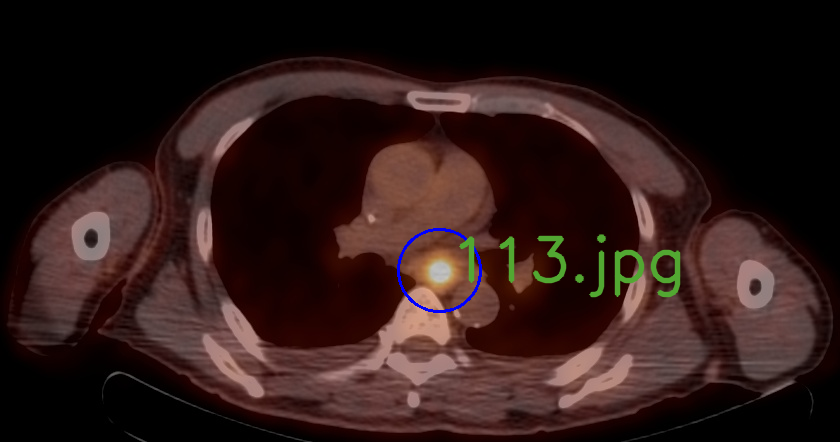

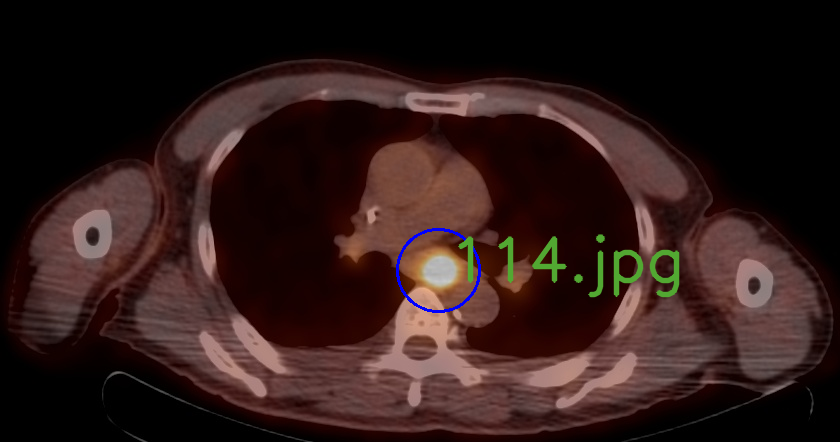

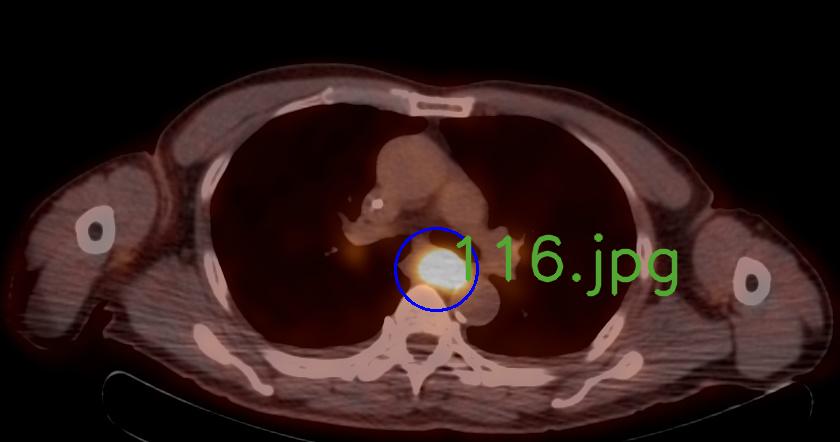

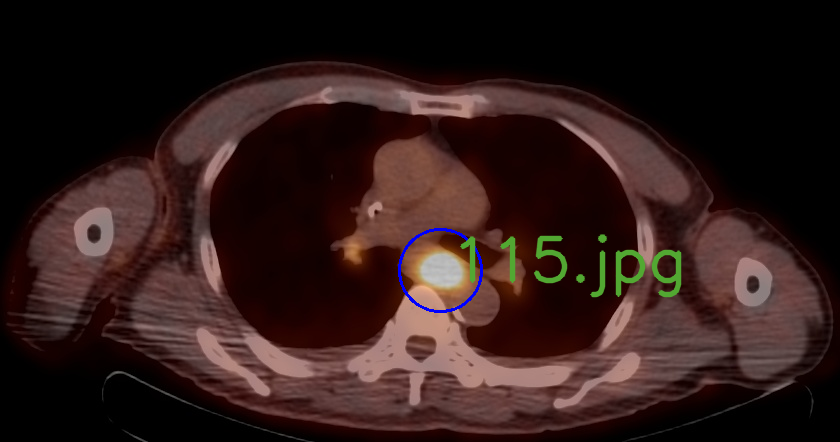

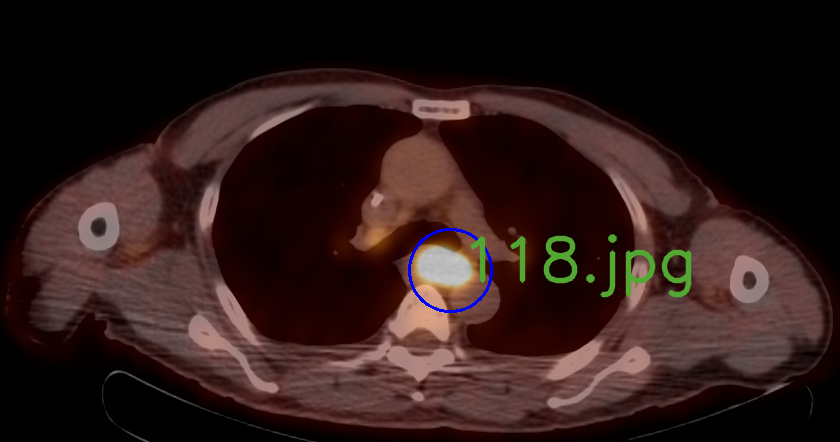

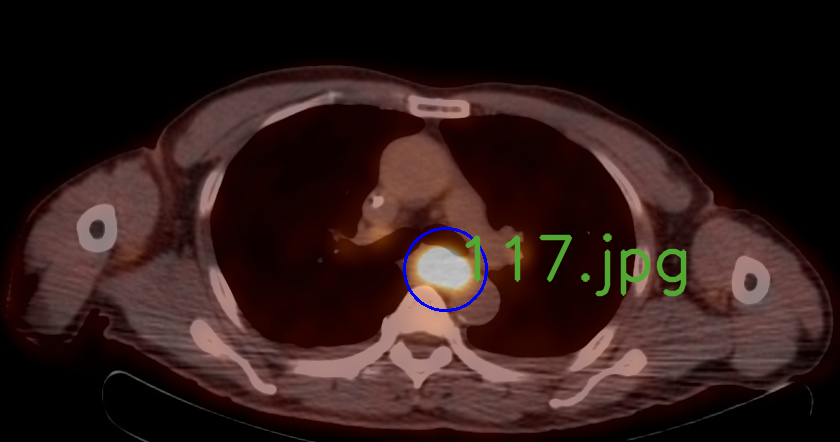

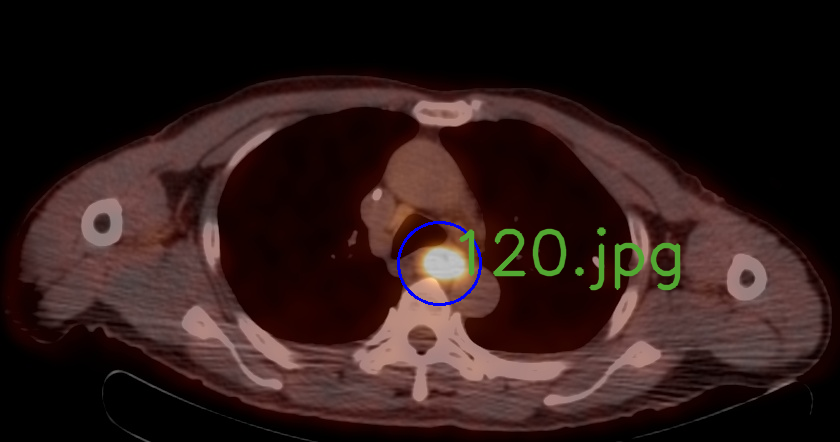

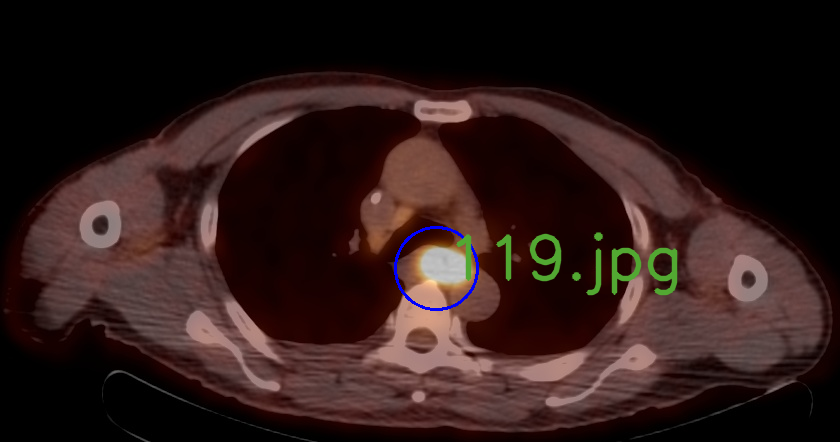

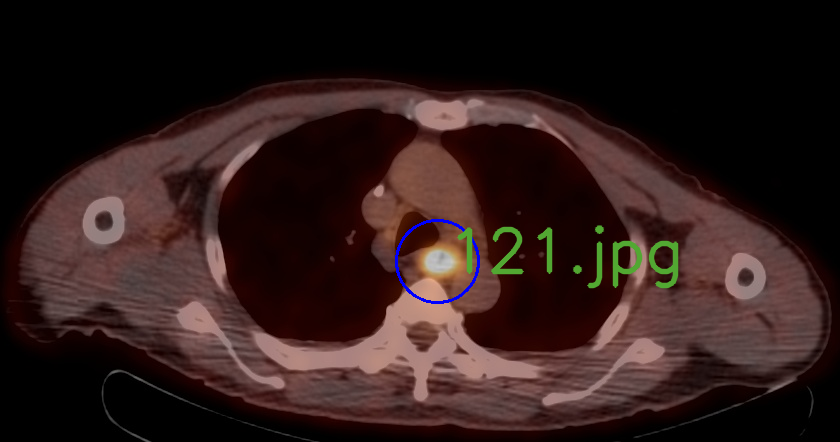

In [ ]:
for i in path:
    img = cv2.imread(i) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #RGB轉灰階
    blur = cv2.GaussianBlur(gray, (41,41), 0) #高斯模糊除雜訊
    #開始找最大像素點(亮點座標)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(blur) #回傳最小、大的像素值和座標

    #判斷是否為亮點
    if maxVal >= 175:
        cv2.circle(img, maxLoc, 41, (255, 0, 0), 2) #在座標上畫一個園
        cv2.putText(img, str(i), (maxLoc[0]+10, maxLoc[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 2,
		(50, 168, 82), 3, cv2.LINE_AA) #cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
        cv2.imwrite(output_folder + i, img)
        cv2_imshow(img) 

# 二值化(腫瘤特徵與背景分離)

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/ESO/bright spot')
path = (glob.glob("*.jpg"))
output_folder = "thresh/"
if not os.path.exists(output_folder): os.makedirs(output_folder)
for i in path:
    image = cv2.imread(i)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (41,41),0)
    thresh = cv2.threshold(blur, 170, 255, cv2.THRESH_BINARY)[1]  # 轉為黑白二值化
    cv2.imwrite(output_folder + i, thresh)

# 面積計算

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/ESO/bright spot/thresh')
path = (glob.glob("*.jpg"))

In [ ]:
f = open("area.txt", "w") #串建txt準備儲存面積數值
for i in path:
    image = cv2.imread(i)
    edged = cv2.Canny(image, 170, 255) #Canny演算法，算出邊緣。170下限閥值
    #確認邊緣訊息
    (contours,_) = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #cv2.RETR_EXTERNAL外部輪廓；CHAIN_APPROX_SIMPLE簡單輪廓

    area = cv2.contourArea(contours[0]) #計算面積
    print(str(i) + "面積: %.2f" %area)
    value = "%s = %.2f" %(i, area) + "\n" #寫入txt的格式
    f.write(value) #寫入
    edged = cv2.resize(edged, (600,600)) #縮小圖片
f.close()

113.jpg面積: 85.00
114.jpg面積: 370.00
116.jpg面積: 909.00
115.jpg面積: 740.50
118.jpg面積: 1026.50
117.jpg面積: 1039.50
120.jpg面積: 659.50
119.jpg面積: 985.00
121.jpg面積: 152.50
